# Chapter 1.2 Anatomy of a Qubit

We start with its most fundamental unit: the **qubit**. Unlike a classical bit, which is either a 0 or a 1, a qubit lives in a richer mathematical world. It doesn't just *choose* between 0 and 1—it can *blend* them.

This blending happens in a complex vector space, and to describe it, physicists use **Dirac notation**, a sleek and powerful shorthand. A quantum state is written as a **ket**, like this: $|\psi\rangle$. Think of it as the quantum version of a column vector. The *dual* of a ket is a **bra**, written $\langle \psi|$, which you can think of as its row vector counterpart. Together, a *bra-ket* like $\langle \phi | \psi \rangle$ gives you an inner product—an essential tool for calculating things like measurement probabilities.

Let's begin with the two building blocks of every qubit.

### The Computational Basis

The **computational basis** consists of two orthonormal states, denoted $|0\rangle$ and $|1\rangle$. These are like the "North" and "South" poles of a qubit's world.

* The **zero state**, $|0\rangle$, is represented as:

  $$
  |0\rangle = \begin{pmatrix} 1\\ 0\end{pmatrix}
  $$

  This is the state we might think of as analogous to the classical bit 0.

* The **one state**, $|1\rangle$, is:

  $$
  |1\rangle = \begin{pmatrix} 0\\ 1\end{pmatrix}
  $$

  This plays the role of the classical 1.

Let's import necessary packages and write down their exact definition in Python:

In [3]:
import numpy as np
import scipy as sp
import scipy.linalg as la
from IPython.display import display, Latex
from qsip.visualization.bloch import Bloch

zero_state = np.array([[1.0], [0.0]])
one_state = np.array([[0.0], [1.0]])
print(zero_state)
print(one_state)

[[1.]
 [0.]]
[[0.]
 [1.]]


### Superposition: The Quantum Blend

A qubit can be in a state that's *simultaneously* a little bit $|0\rangle$ and a little bit $|1\rangle$. Not in a vague metaphoric way, but as a precise mathematical reality. Any **pure** qubit state (we will talk about non-pure, or mixed, states later) can be written as:

$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle
$$

Here, $\alpha$ and $\beta$ are complex numbers, and they must satisfy the normalization condition:

$$
|\alpha|^2 + |\beta|^2 = 1
$$

$|\alpha|^2$ and $|\beta|^2$ are interpreted as the probability of finding  the qubit in $|0\rangle$ and  $\beta|1\rangle$, respectively. This condition ensures that the total probability of finding the qubit in *some* state when measured is 100%.

### Inner Products and Orthonormality

Dirac notation shines when computing inner products. For example:

$$
\langle 0 | 1 \rangle = 0, \quad \langle 0 | 0 \rangle = \langle 1 | 1 \rangle = 1
$$

This tells us that $|0\rangle$ and $|1\rangle$ are not only orthogonal but also normalized—hence, an orthonormal basis. If you take two arbitrary states, say $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ and $|\phi\rangle = \gamma|0\rangle + \delta|1\rangle$, their inner product is:

$$
\langle \phi | \psi \rangle = \bar{\gamma}\alpha + \bar{\delta}\beta
$$

The inner product measures how "aligned" the two states are—how much one overlaps with the other.

### The Plus and Minus States

To showcase the power of superposition, let's look at two special states:

* The **plus state**:

  $$
  |+\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix}
  $$

  This state is an equal blend of $|0\rangle$ and $|1\rangle$. When measured in the computational basis, it yields either outcome with equal probability.

* The **minus state**:

  $$
  |-\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ -1 \end{pmatrix}
  $$

  Here, the same amplitudes appear, but with opposite signs. This subtle change leads to very different behavior under certain quantum operations.

Together, $|+\rangle$ and $|-\rangle$ form the **Hadamard basis**, an alternative to the computational basis that's essential in many quantum algorithms. Just like $|0\rangle$ and $|1\rangle$, they are orthonormal:

$$
\langle + | - \rangle = 0, \quad \langle + | + \rangle = \langle - | - \rangle = 1
$$

In [3]:
# Define a utility function to normalize any quantum state
def normalize(state_vector):
    """Normalize a quantum state to ensure total probability is 1."""
    return state_vector / la.norm(state_vector)

# Create a superposition: the |+> state
plus_state = normalize(zero_state + one_state)
minus_state = normalize(zero_state - one_state)

# Display the results

print("Plus state:\n", plus_state)
print("Minus state:\n", minus_state)

Plus state:
 [[0.70710678]
 [0.70710678]]
Minus state:
 [[ 0.70710678]
 [-0.70710678]]


## The Bloch Sphere

Now that we've seen how a qubit can be written as a linear combination of $|0\rangle$ and $|1\rangle$, it's time to give that abstract vector a shape. The **Bloch sphere** is the geometric stage where single-qubit states come to life.

Recall that a pure qubit state is a unit vector in a two-dimensional complex Hilbert space:

$$
|\psi\rangle = a|0\rangle + b|1\rangle, \quad a, b \in \mathbb{C}, \quad |a|^2 + |b|^2 = 1
$$

While this form is mathematically complete, the two complex numbers $a$ and $b$ contain more information than we physically need. Quantum mechanics allows us to **ignore the global phase** of a state—any overall complex factor of the form $e^{i\alpha}$ leaves measurement outcomes unchanged.

This allows us to reparameterize the state using just two real angles, $\theta$ and $\phi$:

$$
|\psi\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle + e^{i\phi} \sin\left(\frac{\theta}{2}\right)|1\rangle
$$

Here:

* $\theta \in [0, \pi]$ is the **colatitude** (the angle from the north pole, or $|0\rangle$).
* $\phi \in [0, 2\pi)$ is the **azimuthal angle** (longitude in the $x$–$y$ plane).

With this representation, each pure qubit state corresponds to a point on the surface of a unit sphere in 3D space—the **Bloch sphere**.

### The Bloch Vector

To visualize this mapping explicitly, we associate the state $|\psi\rangle$ with a unit vector in $\mathbb{R}^3$:

$$
\hat{n} = 
\begin{pmatrix}
\sin\theta \cos\phi \\
\sin\theta \sin\phi \\
\cos\theta
\end{pmatrix}
$$

This **Bloch vector** $\hat{n}$ captures the full physical content of the qubit (excluding global phase). It allows us to visualize quantum states as points on the sphere and quantum gates as rotations of that vector.

For example:

* The state $|0\rangle$ corresponds to the **north pole**: $(0, 0, 1)$
* The state $|1\rangle$ sits at the **south pole**: $(0, 0, -1)$
* The state $|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ lies on the **equator**, pointing along the x-axis: $(1, 0, 0)$
* The state $|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$ lies along the **negative x-axis**: $(-1, 0, 0)$

### Why It Matters

The Bloch sphere is more than just a pretty picture—it provides a powerful visual language. Single-qubit gates become rotations of the sphere, and quantum algorithms often reduce to navigating paths across its surface.

Understanding this geometry builds the foundation for interpreting quantum dynamics, visualizing entanglement, and designing quantum circuits that do more than shuffle symbols—they reshape space.

> **Reminder:** The global phase $e^{i\alpha}$ is not reflected on the Bloch sphere because it has no observable effect. Only the *relative* phase between $|0\rangle$ and $|1\rangle$ has physical meaning.

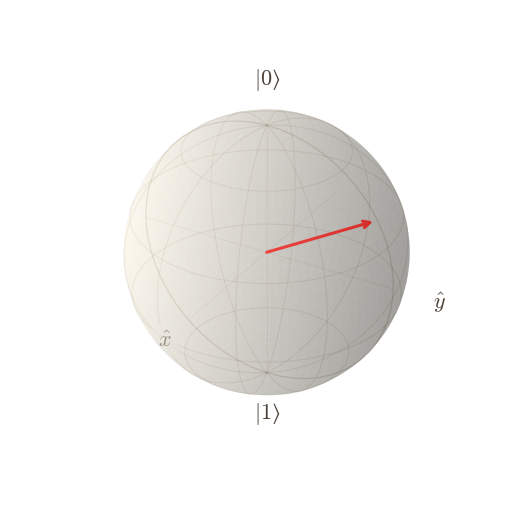

In [4]:
# Define Bloch vector from θ and φ
def bloch_vector(theta, phi):
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return [x, y, z]

# Angles in radians
theta = np.pi / 3  # 60 degrees
phi = np.pi / 2    # 90 degrees

# Get the vector
vec = bloch_vector(theta, phi)

# Create Bloch sphere and add vector using qsip
b = Bloch()
b.vector_color = ['r']  # Optional: set vector color
b.add_vectors(vec)
b.show()  # This will render the Bloch sphere